Условие: Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. 
Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно заданном интервале
моделирования. Отыскать экстремум предложенного критерия как функции 4-х параметров модели. 
Входными параметрами будут: x - количество жертв, y - количество хищников, А так же коэффициенты:
alfa - количество рожденных жертв, 
beta - количество съеденных жертв, 
gamma - количество умерших хищников, 
delta - количество воспроизведенных хищников. Рассматривается закрытый ареал. Предполагается, что животные не иммигрируют и
не эмигрируют, и что еды для травоядных животных имеется с избытком. Тогда уравнение изменения количества жертв 
(без учета хищников) принимает вид: 
dx/dt = ax 
Пока хищники не охотятся, они вымирают, следовательно, уравнение для
численности хищников (без учёта численности жертв) принимает вид: 
dy/dt = -cy 
При встречах хищников и жертв (частота которых прямо пропорциональна величине xy происходит убийство жертв с коэффициентом b , сытые хищники способны к воспроизводству с коэффициентом d . С учётом этого, система уравнений модели такова: 
dx/dt = ax - bxy = (a-by)x 
dy/dt = -cy + dxy = (dx - c)y

In [83]:
from scipy.optimize import fsolve, minimize
import numpy as np
import math 
import matplotlib.pyplot as plt

In [85]:
class Biome(object):

    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        self.pred_init = pred_init
        self.prey_init = prey_init
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, delta, gamma):
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        for i in range(self._n_iters - 1):
          self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
          self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        fig, axes = plt.subplots(1, 1, figsize=(20, 10))
        axes.set_xlabel('time')
        axes.set_ylabel('n')
        axes.plot(self.time, self.pred, label='predators', color='r')
        axes.plot(self.time, self.prey, label='preys', color='b')
        axes.legend(loc = 'upper right')
        axes.grid()
        plt.show()

    def plot_cycle(self):
        fig, axes = plt.subplots(1, 1, figsize=(20, 10))
        axes.set_xlabel('n predators')
        axes.set_ylabel('n preys')
        axes.plot(self.pred, self.prey, color='black')
        axes.grid()
        plt.show()

In [96]:
def koef(parameters):
    alpha = parameters[0]
    beta  = parameters[1]
    gamma = parameters[2]
    delta = parameters[3]

    x_stac = gamma / delta
    y_stac = alpha / beta

    c = beta * y + delta * x - alpha * np.log(np.abs(y)) - gamma * np.log(np.abs(x))
    
   
    def x_f(x):
        return beta * y_stac + delta * x - alpha * np.log(np.abs(y_stac)) \
               - gamma * np.log(np.abs(x)) - c
    
    def y_f(y):
        return beta * y + delta * x_stac - alpha * np.log(np.abs(y)) \
               - gamma * np.log(np.abs(x_stac)) - c

    min_x = fsolve(x_f, 0.001)
    min_y = fsolve(y_f, 0.001)

    return np.abs(min_y / min_x - 1.45)

In [97]:
solution = minimize(koef, [3, 3, 1, 2])
print("alpha = ", round(solution.x[0],4))
print("beta =  ", round(solution.x[1],4))
print("gamma = ", round(solution.x[2],4))
print("delta = ", round(solution.x[3],4))

alpha =  3.3717
beta =   2.6987
gamma =  2.1254
delta =  2.3143


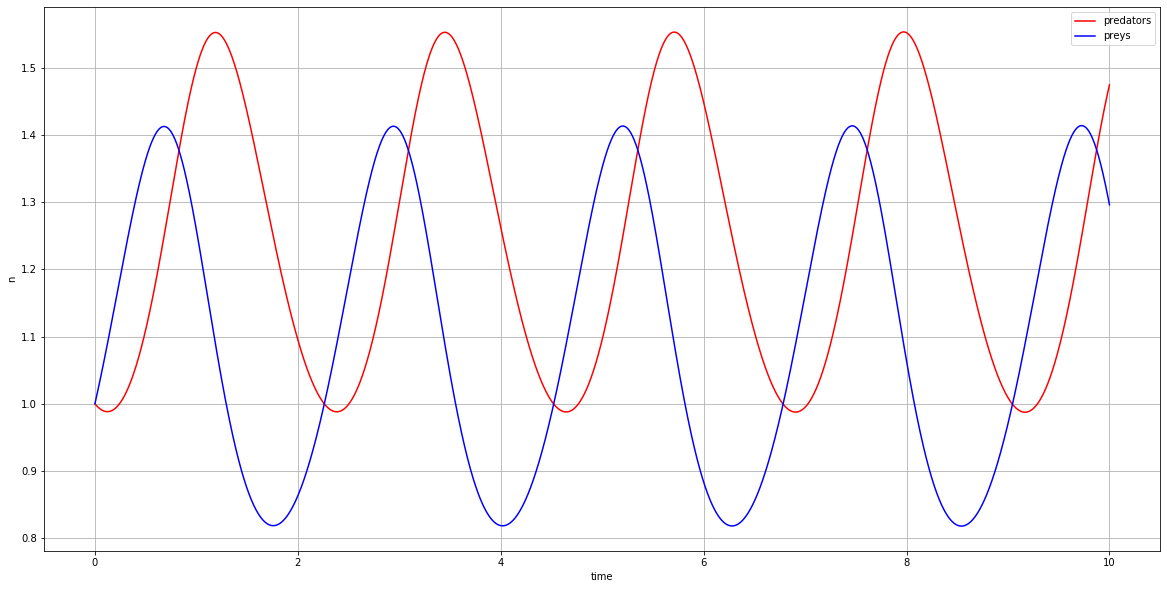

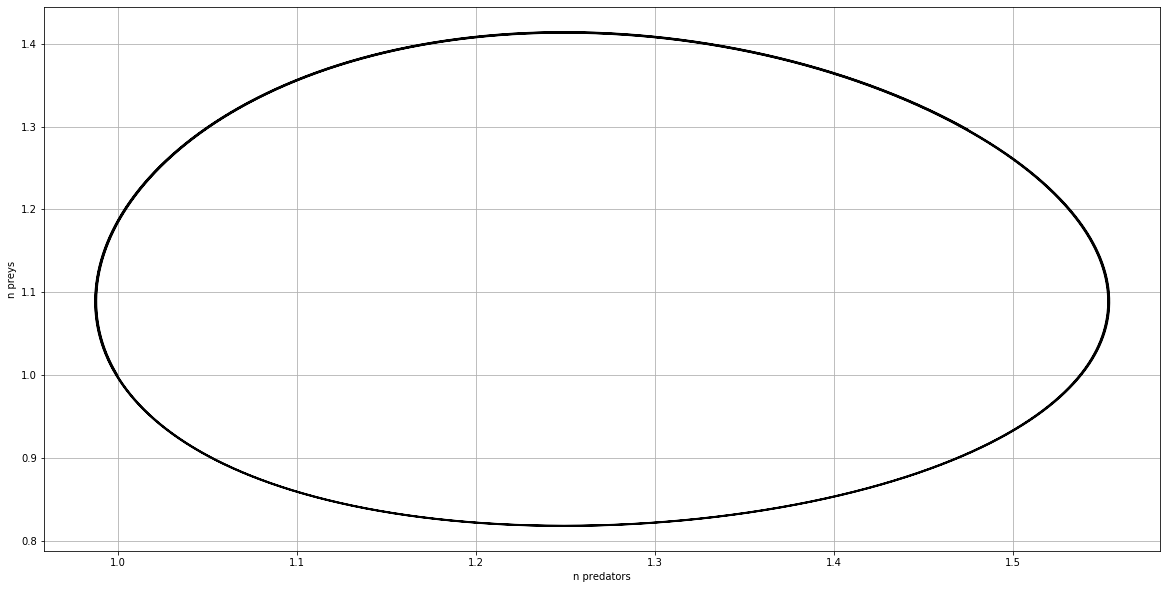

In [98]:
biome = Biome(pred_init=y, prey_init=x, tmax=10, dt=0.0001)
biome.run(solution.x[0], solution.x[1], solution.x[2], solution.x[3])
biome.plot()
biome.plot_cycle()